In [1]:
import pandas as pd

In [2]:
#importing data from different file 

df1 = pd.read_csv(r'C:\Users\rajse\Documents\Data\twittersearch.csv',encoding='iso-8859-1',nrows=200)
df2 = pd.read_csv(r'C:\Users\rajse\Documents\Data\self-drive-DFE.csv',encoding='iso-8859-1',nrows=200)
df3 = pd.read_csv(r'C:\Users\rajse\Documents\Data\nuclear_power.csv',encoding='iso-8859-1',nrows=200)
df4 = pd.read_csv(r'C:\Users\rajse\Documents\Data\airline.csv',encoding='iso-8859-1',nrows=200)
df6 =  pd.read_csv(r'C:\Users\rajse\Documents\Data\metootweets.csv',encoding='iso-8859-1',nrows=120)


In [3]:
#Create a large data frame with the comeents and ID to analyze the comments 

df = pd.concat([df1[['id', 'text']] ,
                df2[['id','text']],
                df3[['text']],
                df4[['id', 'text']],
                df6[['id', 'text']]])


In [4]:
df.drop([60,61],axis=0)


,id,text
0,7.96503e+17,Citizenship and Immigration Canada site back u...
1,7.96502e+17,US|Want to Move to Canada? Europe? Somewhere? ...
2,7.96502e+17,homies from the states gotta get that immigrat...
3,7.96502e+17,Canada's immigration website has been crashing...
4,7.96502e+17,Canada's immigration website crashed last nigh...
...,...,...
115,2365003,RT @ZerlinaMaxwell: Reminder: MOST domestic ab...
116,2365002,RT @emorwee: BREAKING: The @NSF (a huge govern...
117,2365001,Imagine being a successful woman in a male dom...
118,2365000,RT @KateUpton: It?s disappointing that such an...


In [5]:
df.drop([60,61], inplace = True) 

In [6]:
import numpy as np 
df['text']=df['text'].fillna('na')
df['id']=df['id'].fillna(2000000)


In [7]:
#Create a list with all the tweet
d = list()
for i in df['text']:
    d.append(str.lower(i))


In [8]:
#clean all the special character from the list 

SYMBOLS = '{}!@#$%^&*(_+=?><:"\()[].,:;+-*/&|''<>\n=~' 

results = []
for element in d:
    temp = ""
    for ch in str.lower(element):
        if ch not in SYMBOLS:
            temp += ch

    results.append(temp)

#print (results)



In [9]:
#Create the token for each tweets 

tokens = [i.split(' ') for i in results]
for i in range (len(tokens)):
    print(tokens[i])


lderon', 'comsatori', 'cuando', 'esta', 'seora', 'habla', 'es', 'como', 'leer', 'los', 'twits', 'de', 'ivanka', 'trump', 'con', 'el', 'ht', 'me']
['rt', 'alexwitze', 'nsf', 'will', 'require', 'institutions', 'that', 'receive', 'grant', 'funds', 'to', 'tell', 'them', 'if', 'pis', 'copis', 'or', 'anyone', 'on', 'the', 'grant', 'is', 'found', 'to', 'have']
['listening', 'to', 'the', 'awesome', 'feminist', 'scholar', 'cynthia', 'enloe', 'speaking', 'about', 'the', 'relationship', 'between', 'the', 'metoo', 'movement', 'httpstcoaeoohchgwa']
['', 'httpstcogwawglka36']
['rt', 'albertobernalle', 'a', 'ver', 'donde', 'estn', 'todas', 'las', 'voceras', 'colombianas', 'del', 'metoo', 'no', 'van', 'a', 'decir', 'nada', 'ante', 'esto', 'de', 'verdad', 'se', 'van', 'a', 'qued']
['rt', 'sassysanborn', 'we', 'cant', 'romanticize', 'the', 'same', 'things', 'we', 'rally', 'against', 'we', 'cant', 'have', 'it', 'both', 'ways', 'theres', 'no', 'room', 'for', 'fifty', 'shades', 'in']
['rt', 'defendevropa',

In [10]:
# All tokens from all tweets 

all_tokens = []
for elem in tokens:
    for item in elem:
        all_tokens.append(item)

#for i in all_tokens:
    #print(all_tokens)

In [11]:
#find unique word from all tokens 
word=[]
count=[]
unique_words = set(all_tokens)          

In [12]:
#importing all the stop words in english
z=["a", "about", "above", "above", "across", "after", "afterwards", "again", "against", "all", "almost", "alone", "along", "already", "also","although","always","am","among", "amongst", "amoungst", "amount",  "an", "and", "another", "any","anyhow","anyone","anything","anyway", "anywhere", "are", "around", "as",  "at", "back","be","became", "because","become","becomes", "becoming", "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere", "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for", "former", "formerly", "forty", "found", "four", "from", "front", "full", "further", "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least", "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself", "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per", "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed", "seeming", "seems", "serious", "several", "she", "should", "show", "side", "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone", "something", "sometime", "sometimes", "somewhere", "still", "such", "system", "take", "ten", "than", "that", "the", "their", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon", "these", "they", "thick", "thin", "third", "this", "those", "though", "three", "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward", "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us", "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon", "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole", "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you", "your", "yours", "yourself", "yourselves", "the",'','i']

In [13]:
#Remove the stop words present in the tweets 
for j in range(len(z)):
        if z[j] in unique_words:
                unique_words.remove(z[j])

In [14]:
#find the frequency of each tokens / words 
for words in unique_words :
    if(all_tokens.count(words)>60): 

        word.append(str.lower(words))
        count.append(all_tokens.count(words))

In [15]:
freqency = pd.DataFrame()
freqency['words']=word
freqency['counts']=count

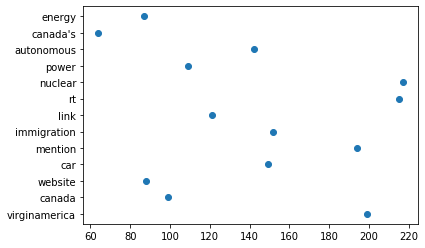

In [16]:
#plot the frequency of words based on threshold 
import matplotlib.pyplot as plt
plt.scatter(freqency['counts'],freqency['words'])




In [17]:
#Creating lists when the specific words present in the tweets it will give 1 other wise 0 
MeToo=[]
for i in range (len(tokens)):
    if 'too' in tokens[i] :
                MeToo.append(1)
    if 'too' not in tokens[i] :
        MeToo.append(0)

nuclear=[]
for i in range (len(tokens)):
    if 'nuclear' in tokens[i] :
                nuclear.append(1)
    if 'nuclear' not in tokens[i] :
        nuclear.append(0)

immigration=[]
for i in range (len(tokens)):
            if 'immigration' in tokens[i] :
                        immigration.append(1)
            if 'immigration' not in tokens[i] :
                immigration.append(0)

autonomous=[]
for i in range (len(tokens)):
            if 'autonomous' in tokens[i] :
                        autonomous.append(1)
            if 'autonomous' not in tokens[i] :
                autonomous.append(0)

virginAmarica=[]
for i in range (len(tokens)):
            if 'virginAmarica' in tokens[i] :
                        virginAmarica.append(1)
            if 'virginAmarica' not in tokens[i] :
                virginAmarica.append(0)

power=[]
for i in range (len(tokens)):
    if 'power' in tokens[i] :
                power.append(1)
    if 'power' not in tokens[i] :
        power.append(0)

canada=[]
for i in range (len(tokens)):
            if 'canada' in tokens[i] :
                        canada.append(1)
            if 'canada' not in tokens[i] :
                canada.append(0)

car=[]
for i in range (len(tokens)):
            if 'car' in tokens[i] :
                        car.append(1)
            if 'car' not in tokens[i] :
                car.append(0)

flight=[]
for i in range (len(tokens)):
            if 'flight' in tokens[i] :
                        flight.append(1)
            if 'flight' not in tokens[i] :
                flight.append(0)

energy=[]
for i in range (len(tokens)):
            if 'energy' in tokens[i] :
                        energy.append(1)
            if 'energy' not in tokens[i] :
                energy.append(0)

website=[]
for i in range (len(tokens)):
            if 'website' in tokens[i] :
                        website.append(1)
            if 'website' not in tokens[i] :
                website.append(0)

link=[]
for i in range (len(tokens)):
            if 'link' in tokens[i] :
                        link.append(1)
            if 'link' not in tokens[i] :
                link.append(0)


In [18]:
tweet=[]
for i in range (len(df)):
    tweet.append('tweet ' + str(i+1))

In [19]:
len(tweet)


900

In [20]:
#Modifying & creating data frame based on the new list 
df['Tweets'] = tweet
df['immigration'] = immigration
df['autonomous'] = autonomous
df['virginAmarica'] = virginAmarica
df['nuclear'] = nuclear
df['MeToo'] = MeToo
df['tweets'] = tweet
df['canada'] = canada
df['flight'] = flight
df['car'] = car
df['power'] = power
df['energy'] = energy
df['link'] = link
df['website'] = website



In [21]:
# New data matrix
dm = df[['immigration','autonomous','virginAmarica',  'nuclear','MeToo',
'canada','flight','car','power','energy','website','link']]
#,'tweets']]


In [22]:
#Data matrix  based on tweets and the presence of specific words 
dm.head()

,immigration,autonomous,virginAmarica,nuclear,MeToo,canada,flight,car,power,energy,website,link
0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,1,0


#normalize Term frequency calculation for each tweets

In [23]:
 #Creating New lists for the frequency of specific word in each tweets 
MeToo_tf=[]
for i in range (len(tokens)):
    if 'too' in tokens[i] :
                MeToo_tf.append(1/len(tokens[i]))
    if 'too' not in tokens[i] :
        MeToo_tf.append(0)

nuclear_tf=[]
for i in range (len(tokens)):
    if 'nuclear' in tokens[i] :
                nuclear_tf.append(1/len(tokens[i]))
    if 'nuclear' not in tokens[i] :
        nuclear_tf.append(0)

immigration_tf=[]
for i in range (len(tokens)):
            if 'immigration' in tokens[i] :
                        immigration_tf.append(1/len(tokens[i]))
            if 'immigration' not in tokens[i] :
                immigration_tf.append(0)

autonomous_tf=[]
for i in range (len(tokens)):
            if 'autonomous' in tokens[i] :
                        autonomous_tf.append(1/len(tokens[i]))
            if 'autonomous' not in tokens[i] :
                autonomous_tf.append(0)

virginAmarica_tf=[]
for i in range (len(tokens)):
            if 'virginAmarica' in tokens[i] :
                        virginAmarica_tf.append(1/len(tokens[i]))
            if 'virginAmarica' not in tokens[i] :
                virginAmarica_tf.append(0)

power_tf=[]
for i in range (len(tokens)):
    if 'power' in tokens[i] :
                power_tf.append(1/len(tokens[i]))
    if 'power' not in tokens[i] :
        power_tf.append(0)

canada_tf =[]
for i in range (len(tokens)):
            if 'canada' in tokens[i] :
                        canada_tf.append(1/len(tokens[i]))
            if 'canada' not in tokens[i] :
                canada_tf.append(0)

car_tf =[]
for i in range (len(tokens)):
            if 'car' in tokens[i] :
                        car_tf.append(1/len(tokens[i]))
            if 'car' not in tokens[i] :
                car_tf.append(0)

flight_tf =[]
for i in range (len(tokens)):
            if 'flight' in tokens[i] :
                        flight_tf.append(1/len(tokens[i]))
            if 'flight' not in tokens[i] :
                flight_tf.append(0)

energy_tf =[]
for i in range (len(tokens)):
            if 'energy' in tokens[i] :
                        energy_tf.append(1/len(tokens[i]))
            if 'energy' not in tokens[i] :
                energy_tf.append(0)

website_tf =[]
for i in range (len(tokens)):
            if 'website' in tokens[i] :
                        website_tf.append(1/len(tokens[i]))
            if 'website' not in tokens[i] :
                website_tf.append(0)

link_tf =[]
for i in range (len(tokens)):
            if 'link' in tokens[i] :
                        link_tf.append(1/len(tokens[i]))
            if 'link' not in tokens[i] :
                link_tf.append(0)


In [24]:
#Creating new data frame for the above created lists 
tf =  pd.DataFrame()
tf['id'] = df['id']
tf['Tweets'] = tweet
tf['immigration_tf'] = immigration_tf
tf['canada_tf'] = canada_tf
tf['autonomous_tf'] = autonomous_tf
tf['car_tf'] = car_tf
tf['virginAmarica_tf'] = virginAmarica_tf
tf['flight_tf'] = flight_tf
tf['nuclear_tf'] = nuclear_tf
tf['power_tf'] = power_tf
tf['energy_tf'] = energy_tf
tf['link_tf'] = link_tf
tf['website_tf'] = website_tf
tf['MeToo_tf'] = MeToo_tf

In [25]:
tf.head(5)

,id,Tweets,immigration_tf,canada_tf,autonomous_tf,car_tf,virginAmarica_tf,flight_tf,nuclear_tf,power_tf,energy_tf,link_tf,website_tf,MeToo_tf
0,7.96503e+17,tweet 1,0.125000,0.125000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,7.96502e+17,tweet 2,0.000000,0.058824,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,7.96502e+17,tweet 3,0.058824,0.058824,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,7.96502e+17,tweet 4,0.100000,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0
4,7.96502e+17,tweet 5,0.142857,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0


In [26]:
import math

Creating K means by using available python packages 

In [27]:
#Importing the required libraries in python 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [28]:
documents = df['text']

In [29]:
#Eliminates the stop words from the tweets 
vectorizer = TfidfVectorizer(stop_words='english')
#Apply vectorizer on the tweets 
X = vectorizer.fit_transform(documents)

In [30]:
#Apply K- Means by available KMeans packages 
true_k = 5

model = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [31]:
#Create the bag of words / cluster of words 
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :25]:
        print(' %s' % terms[ind],end=' '),
    print('\n')
       

Top terms per cluster:
Cluster 0:
 automated  vehicle  http  autoauto  guided  ford  2017  research  agv  dock  trapac  connected  behave  emergency  fusion  hybrid  ââ  new  supposed  wcdgvwij  model  vehicles  cadillac  announces  sae 

Cluster 1:
 canada  immigration  https  website  crashed  trump  site  crashes  election  americans  ûªs  flee  night  donald  citizenship  people  victory  lol  trying  û_  just  look  presidency  2016  canadian 

Cluster 2:
 virginamerica  flight  https  metoo  rt  http  know  carrieunderwood  time  ladygaga  flights  sexual  just  fly  cancelled  great  check  sfo  need  thanks  service  flying  women  book  love 

Cluster 3:
 nuclear  mention  link  power  rt  energy  plant  quot  fukushima  plants  news  japan  safety  world  pm  iran  carnival  years  daiichi  arabia  ambitions  saudi  progress  science  new 

Cluster 4:
 car  autonomous  http  driving  google  cars  self  ââ  audi  test  drive  ââå  just  permit  california  new  vehicles  gets

In [32]:

x = tf.iloc[:, 2:].values

In [33]:
x

array([[0.125     , 0.125     , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05882353, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05882353, 0.05882353, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

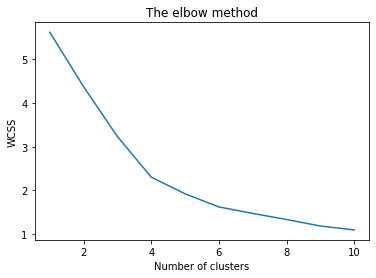

In [34]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [35]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [36]:
kmeans.cluster_centers_

array([[ 2.69090099e-03,  6.48647255e-03,  5.10001786e-04,
         5.02281356e-04,  0.00000000e+00,  6.05456468e-03,
         2.23594110e-03,  1.22583584e-03,  1.02316478e-03,
         2.14264810e-04,  1.27720242e-03,  1.14974740e-03],
       [ 3.29597460e-17,  1.12757026e-17,  6.54020872e-02,
         6.64153150e-02,  0.00000000e+00, -5.20417043e-18,
         3.06184936e-04,  3.35345406e-04,  1.21430643e-17,
        -1.90819582e-17,  8.67361738e-18,  3.20102433e-04],
       [ 8.59095279e-02,  2.85495822e-02,  5.20417043e-18,
         1.73472348e-18,  0.00000000e+00, -4.77048956e-18,
        -1.90819582e-17, -1.38777878e-17,  8.67361738e-18,
        -1.90819582e-17,  5.31546618e-02,  4.11184211e-04],
       [ 3.29597460e-17,  1.21430643e-17,  5.20417043e-18,
        -1.04083409e-17,  0.00000000e+00, -5.63785130e-18,
         6.55761583e-02,  3.68773002e-02,  2.86326624e-02,
         4.83253113e-02,  4.14078675e-04,  3.45065562e-04]])

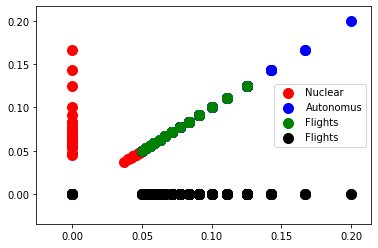

In [37]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Nuclear')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 0], s = 100, c = 'blue', label = 'Autonomus')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Flights')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 100, c = 'black', label = 'Flights')

#Plotting the centroids of the clusters
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

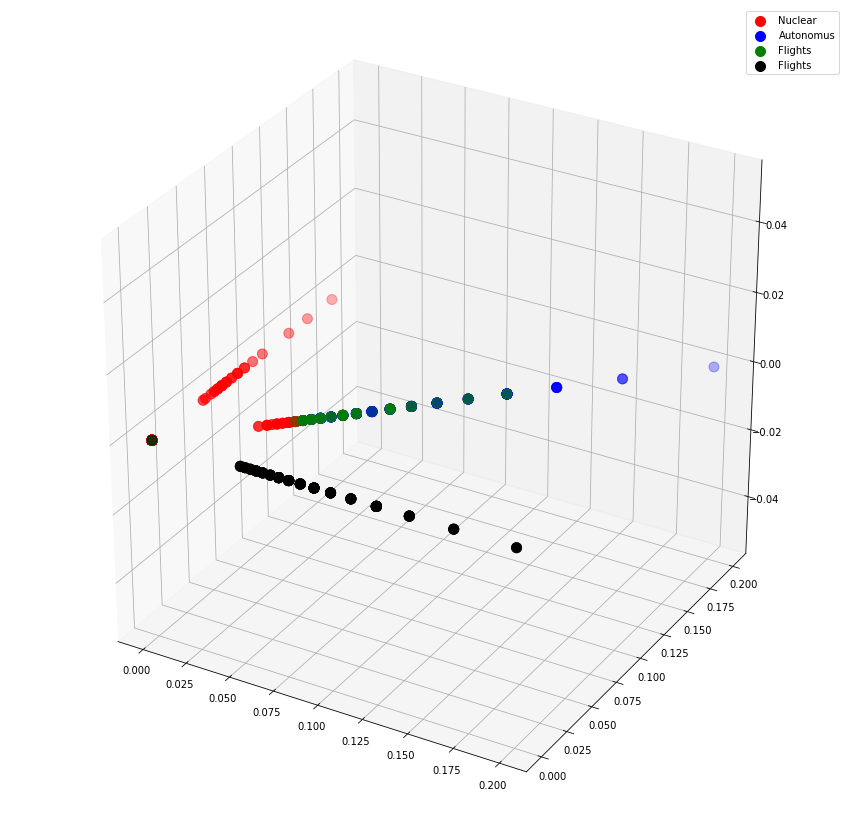

In [38]:
# 3d scatterplot using matplotlib
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,projection= '3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Nuclear')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 0], s = 100, c = 'blue', label = 'Autonomus')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Flights')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 100, c = 'black', label = 'Flights')

#Plotting the centroids of the clusters
#plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 100, c = 'y', label = 'Centroids')
plt.legend()
plt.show()

In [39]:
tf['cluster'] = y_kmeans
tf.head(1)

,id,Tweets,immigration_tf,canada_tf,autonomous_tf,car_tf,virginAmarica_tf,flight_tf,nuclear_tf,power_tf,energy_tf,link_tf,website_tf,MeToo_tf,cluster
0,7.96503e+17,tweet 1,0.125,0.125,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [40]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 1, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

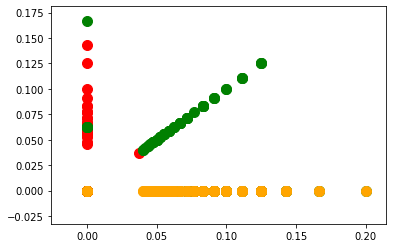

In [41]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 100, c = 'orange', label = 'C4')

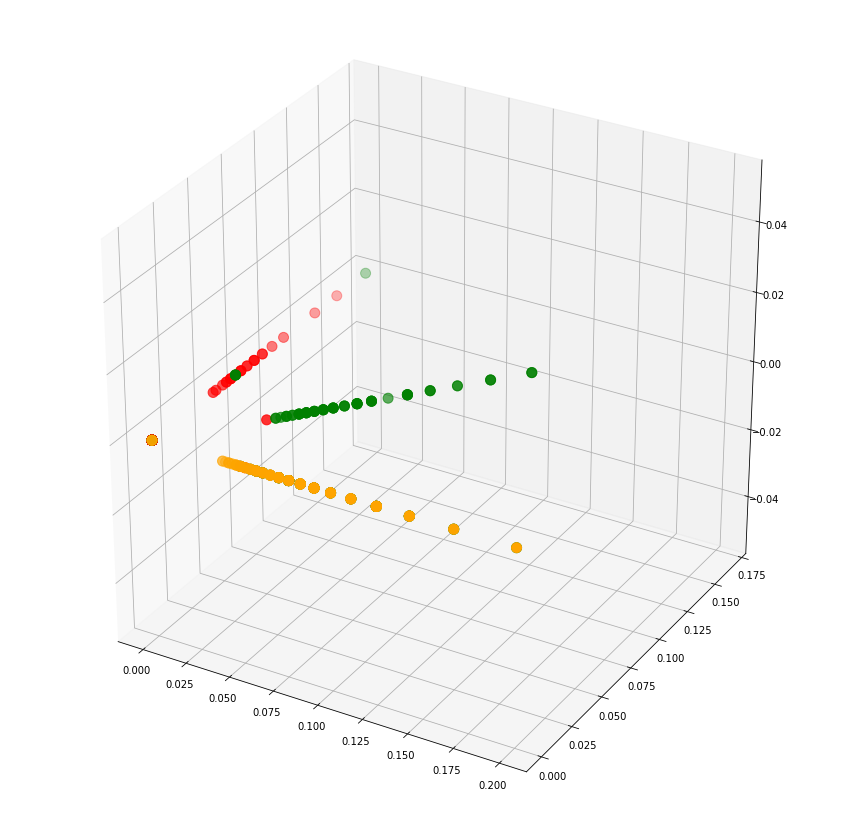

In [42]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111,projection= '3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'C1')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'C3')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 2], s = 100, c = 'orange', label = 'C4')

In [43]:
# Find out tha bags of tweets  fro the final dataframe & show it in a plot 

tf.head()

,id,Tweets,immigration_tf,canada_tf,autonomous_tf,car_tf,virginAmarica_tf,flight_tf,nuclear_tf,power_tf,energy_tf,link_tf,website_tf,MeToo_tf,cluster
0,7.96503e+17,tweet 1,0.125000,0.125000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2
1,7.96502e+17,tweet 2,0.000000,0.058824,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,7.96502e+17,tweet 3,0.058824,0.058824,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2
3,7.96502e+17,tweet 4,0.100000,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.100000,0.0,2
4,7.96502e+17,tweet 5,0.142857,0.000000,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,2


In [44]:
y_kmeans

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [45]:
cluster_1 =[]
cluster_2 =[]
cluster_3 =[]
cluster_4 =[]

for i in range (len(tf)):
    if(tf['cluster'].iloc[i] == 0):
        cluster_1.append(int(tf['id'].iloc[i]))
        #cluster_1.append(tf['Tweets'].iloc[i])

for i in range (len(tf)):
    if(tf['cluster'].iloc[i] == 1):
        cluster_2.append(tf['id'].iloc[i])
        #cluster_2.append(tf['Tweets'].iloc[i])

for i in range (len(tf)):
    if(tf['cluster'].iloc[i] == 2):
        cluster_3.append(tf['id'].iloc[i])
        #cluster_3.append(tf['Tweets'].iloc[i])

for i in range (len(tf)):
    if(tf['cluster'].iloc[i] == 3):
        cluster_4.append(tf['id'].iloc[i])
        #cluster_4.append(tf['Tweets'].iloc[i])

In [46]:
print('Cluster 1 contains flight related  tweets of following id -  ',set(cluster_1))
print('\n')
print('Cluster 2 contains car related tweets of following id -  ',set(cluster_2))
print('\n')
print('Cluster 3 contains immigration related tweets of following id -  ',set(cluster_3))
print('\n')
print('Cluster 4 contains nuclear related  tweets of following id -  ',set(cluster_4))

Cluster 1 contains flight related  tweets of following id -   {796502000000000000, 796501000000000000, 796499000000000000, 796498000000000000, 796500000000000000, 796497000000000000, 796496000000000000, 796495000000000000, 796494000000000000, 796493000000000000, 570301083672813571, 570301031407624196, 569967019958730753, 569922008588222465, 569777607371128834, 569633630978310145, 569323082701275138, 2364999, 2365000, 2365002, 569318651502989312, 569311060903268352, 569494748341407744, 2365011, 569649116487290880, 569881548515708928, 569770363623575552, 569596097540132864, 569305113589714944, 570301130888122368, 570287408438120448, 570084582780899328, 570299953286942721, 570051991277342720, 570010539499393025, 569996245462159361, 569990163209850881, 569920824905306113, 569847920192655361, 570249102404923392, 570045393565691904, 2365042, 569911218942517248, 569907336485019648, 569774078233419776, 569634318349246464, 569627480425766912, 570015408788414464, 569926998824394752, 569915941192

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 


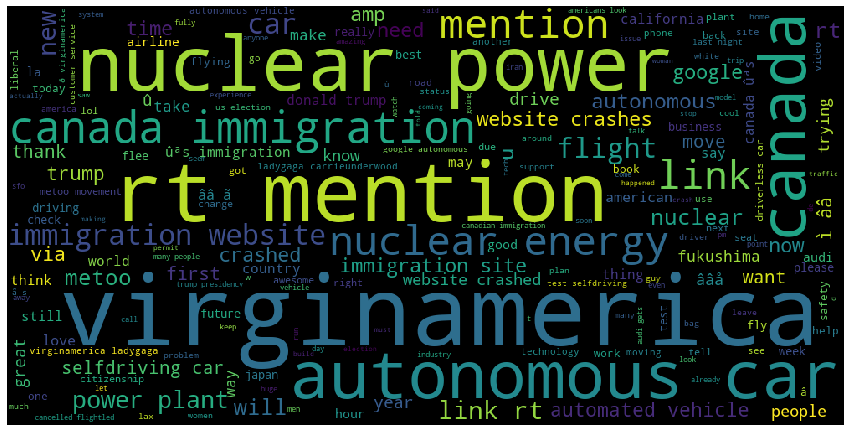

In [48]:
unique_string=(" ").join(all_tokens)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [49]:
tf['text']=df['text']

In [50]:
w1=[]
w2=[]
w3=[]
w4=[]

In [51]:
for i in range (len(tf)):
    if(tf['cluster'].iloc[i] == 0):
        w1.append(tf['text'].iloc[i])
for i in range (len(tf)):
    if(tf['cluster'].iloc[i] == 1):
        w2.append(tf['text'].iloc[i])
for i in range (len(tf)):
    if(tf['cluster'].iloc[i] == 2):
        w3.append(tf['text'].iloc[i])
for i in range (len(tf)):
    if(tf['cluster'].iloc[i] == 3):
        w4.append(tf['text'].iloc[i])
       

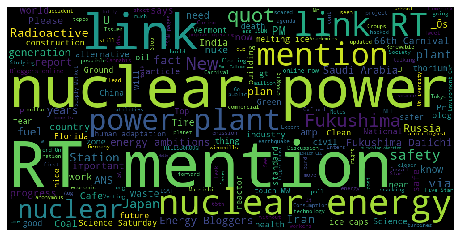

In [52]:
unique_string=(" ").join(w4)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(8,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

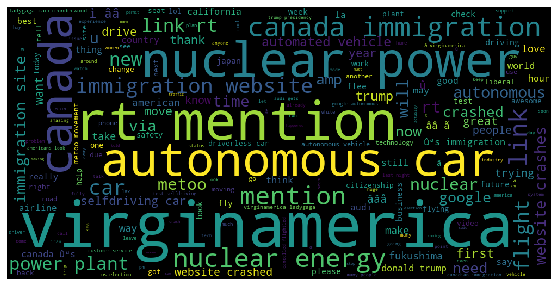

In [53]:
unique_string=(" ").join(all_tokens)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()